Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 8: Use xarray to handle N-dimensional arrays and interactive plotting with geoviews
===============================================================

In many cases in the earth sciences you will be working with remote sensing data that has dense time series and is highly dimensional (e.g. lat x long x time x measurements). Often times working with this data as a typical numpy array my be clunky and error prone and keeping the data in the labeled format with metadata could help resolve many of the errors a data scientists might make. Additionally many of the datasets are so large they can not effectively fit in memory or should be processed in parallel. Here we'll introduce [`xarray`](http://xarray.pydata.org/en/stable/) which effectively resolves nearly all of these challenges. From the documentation: 

>Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning. In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.
>
>Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labeled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

<img src="../data/dataset-diagram.png" alt="drawing" width="750"/>

<br>

One of the other exciting aspects of `xarray` is the ability to use cloud-based data directly off the web and only actually download and process it as needed.

In this chapter we'll be using `xarray` to process ocean color data from the the Ocean Colour Climate Change Initiative project (https://www.oceancolour.org/) from the northern Atlantic Ocean. We'll also be leveraging [`holoviews`](http://holoviews.org/) and [`geoviews`](http://geoviews.org/) in the high level plotting API [`hvplot`](https://hvplot.pyviz.org/). Holoviews is an impressively powerful python library for interactive . Geoviews "is a Python library that makes it easy to explore and visualize geographical, meteorological, and oceanographic datasets, such as those used in weather, climate, and remote sensing research." And `hvplot` is a high level API that provides a consistent and simple interface for using `holoviews` and `geoviews` when plotting any of its supported data types (e.g. Pandas DataFrames, XArray: Datasets, Dask DataFrames, GeoPandas: GeoDataFrames, and much more.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
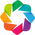

In [19]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
# numpy 
import numpy as np
import dask
# xarray (very handy)
import xarray as xr
import rasterio
# http://geo.holoviews.org/index.html
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import warnings
import sys
gv.extension('bokeh')

#### Simple xarray DataArrays

In [20]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [21]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [22]:
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 40B 10 20 30 40 50

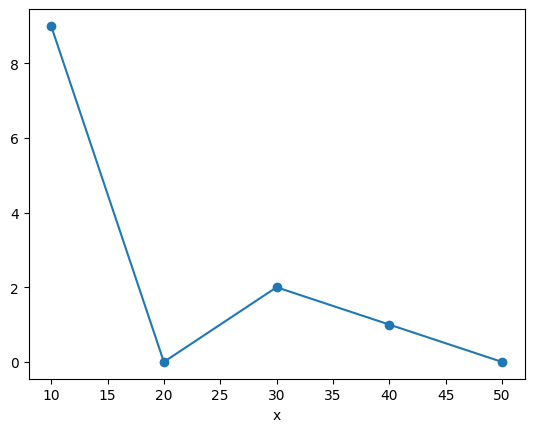

In [23]:
da.plot(marker='o')

## Working with our Ocean Color Dataset

We'll just have `xarray` pull the data in directly from the cloud using OPeNDAP. We're getting this data from the Ocean Colour Climate Change Initiative project (https://www.oceancolour.org/) which compiles a global merged chlorophyll-a product. 

This dataset can be easily opened from an OPeNDAP link using the xarray `open_dataset()` function though it may take a minute or two:

In [24]:
chla_ds = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v5.0-5DAY?lat[1000:1:1550],lon[2350:1:2750],time[1450:1:1650],chlor_a[1450:1:1650][1000:1:1550][2350:1:2750]')
chla_ds

<xarray.Dataset> Size: 178MB
Dimensions:  (lat: 551, lon: 401, time: 201)
Coordinates:
  * lat      (lat) float64 4kB 48.31 48.27 48.23 48.19 ... 25.48 25.44 25.4
  * lon      (lon) float64 3kB -82.06 -82.02 -81.98 ... -65.48 -65.44 -65.4
  * time     (time) datetime64[ns] 2kB 2017-06-25 2017-06-30 ... 2020-03-21
Data variables:
    chlor_a  (time, lat, lon) float32 178MB ...
Attributes: (12/49)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_resolution:          P5D
    time_coverage_duration:            P5D
    start_date:                        22-DEC-2021 00:00:00.000000
    stop_date:                         26-DEC-2021 23:59:00.000000
    time_coverage_start:               202112220000Z
    time_coverage_end:                 202112262359Z

This dataset is a bit larger than we want so we'll slice the dataset down to an area of interest using the .sel() function and the slice() function which allow the user to simply put in the direct lat and lon bounds they want.

In [25]:
chla_ds = chla_ds.sel(lat=slice(44,26),lon=slice(-82,-66))
chla_ds

<xarray.Dataset> Size: 133MB
Dimensions:  (lat: 432, lon: 384, time: 201)
Coordinates:
  * lat      (lat) float64 3kB 43.98 43.94 43.9 43.85 ... 26.15 26.1 26.06 26.02
  * lon      (lon) float64 3kB -81.98 -81.94 -81.9 ... -66.1 -66.06 -66.02
  * time     (time) datetime64[ns] 2kB 2017-06-25 2017-06-30 ... 2020-03-21
Data variables:
    chlor_a  (time, lat, lon) float32 133MB ...
Attributes: (12/49)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_resolution:          P5D
    time_coverage_duration:            P5D
    start_date:                        22-DEC-2021 00:00:00.000000
    stop_date:                         26-DEC-2021 23:59:00.000000
    time_coverage_start:               202112220000Z
    time_coverage_end:                 202112262359Z

### Now that we have the data let's explore it a bit

the main data variable is `chlor_a` which we access as an attribute of the ds object:

#### let's just plot it normally selecting the first element in the time dimension

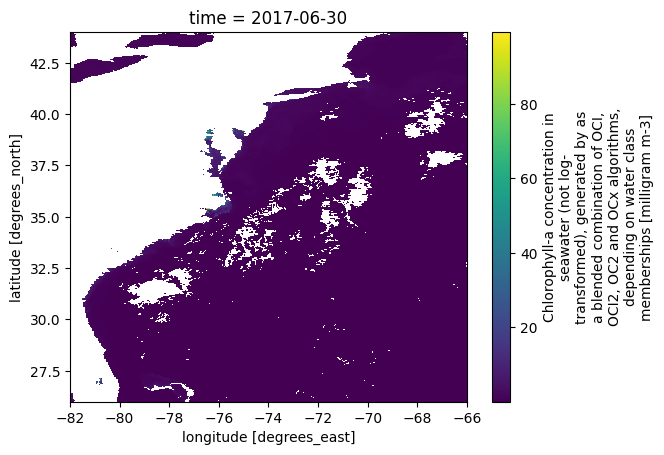

In [26]:
chla_ds.chlor_a.isel(time=1).plot()

Note how it usefully auto labels the axes in the plot. We can use normal matplotlib syntax to modify this plot to be a bit more visually appealing.

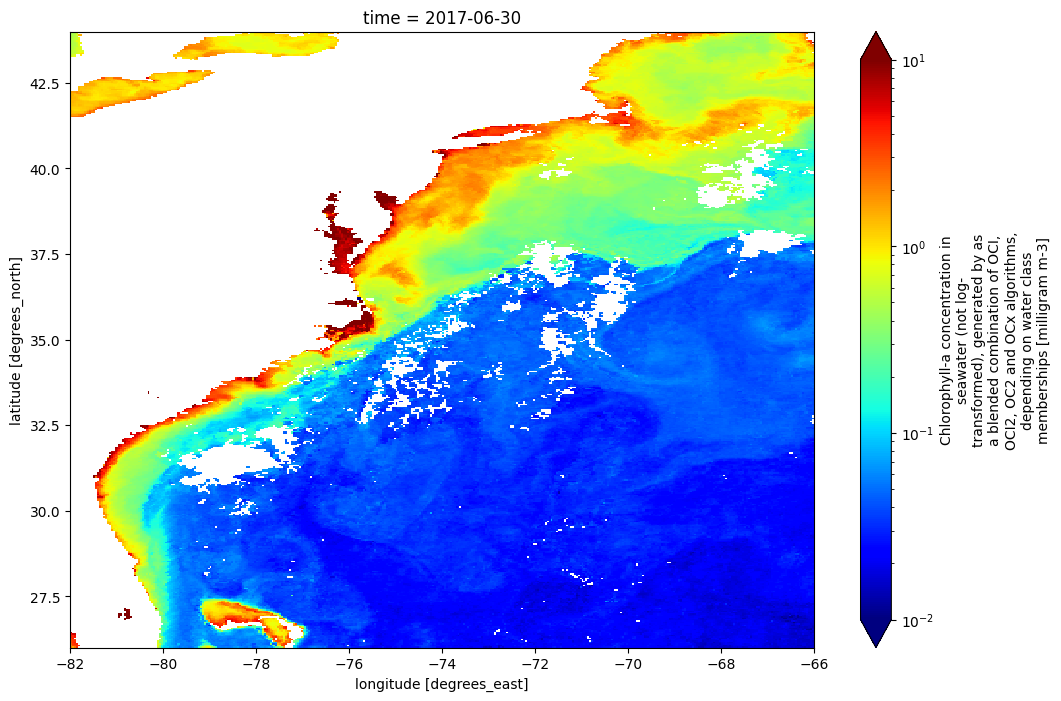

In [27]:
from matplotlib.colors import LogNorm
fig,ax = plt.subplots(figsize=(12,8))
chla_ds = chla_ds.sel(lat=slice(44,26),lon=slice(-82,-66))
chla_ds.chlor_a.isel(time=1).plot(ax=ax, cmap='jet', norm=LogNorm(vmin=0.01, vmax=10))
#ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

How about if we plot it averaging along the longitude and time dimensions and to show average chla amount across latitudes? We'll also just select a time subset to make this go faster.

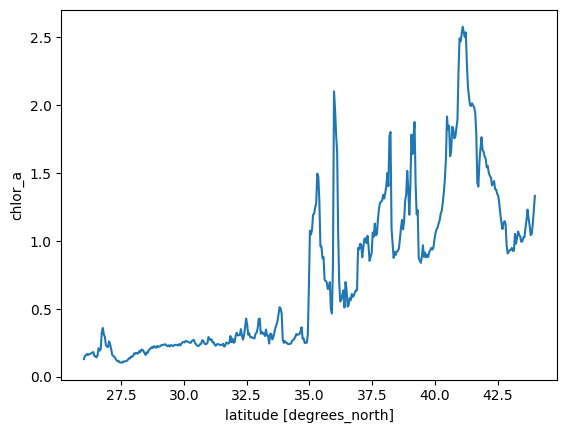

In [28]:
chla_ds.chlor_a.isel(time=slice(30,50)).mean(dim=('lon', 'time')).plot()

If you want to know what times we just averaged you can see them here:

In [29]:
chla_ds.chlor_a.isel(time=slice(30,50)).time

<xarray.DataArray 'time' (time: 20)> Size: 160B
array(['2017-11-22T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
       '2017-12-02T00:00:00.000000000', '2017-12-07T00:00:00.000000000',
       '2017-12-12T00:00:00.000000000', '2017-12-17T00:00:00.000000000',
       '2017-12-22T00:00:00.000000000', '2017-12-27T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-31T00:00:00.000000000', '2018-02-05T00:00:00.000000000',
       '2018-02-10T00:00:00.000000000', '2018-02-15T00:00:00.000000000',
       '2018-02-20T00:00:00.000000000', '2018-02-25T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 160B 2017-11-22 2017-11-27 ... 2018-02-25
Attributes:
    axis:           T
    standard_name:  time
    _ChunkSizes:    1

This gives a little glimpse at how easy it is to handle complex datasets with xarray

#### But a lot of the real power of xarray comes in when we have dense time series so let's look at all of our data.

Let's look at the chl-a across time and longitude, averaged for the latitude range of 34-35. This is effectively off Cape Hatteras and out into the ocean.

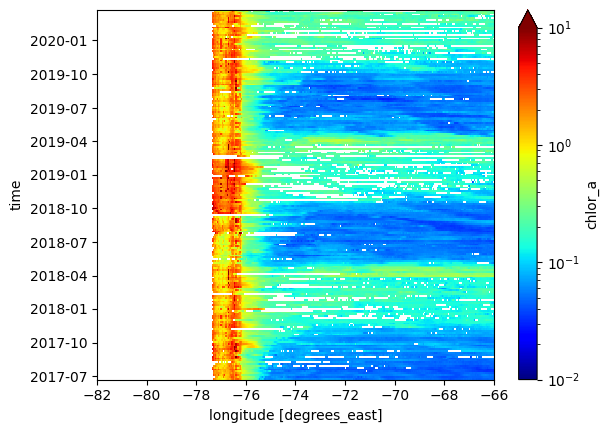

In [30]:
chla_ds.chlor_a.sel(lat=slice(35,34.5)).mean(dim=('lat'), skipna=True).plot( cmap='jet', norm=LogNorm(vmin=0.01, vmax=10))

Now this is really cool! We can see intense seasonality out in the open ocean and along the coastal areas with the most productivity in the winter both for the ocean and coast.

Let's take the average chla in two different regions, one north and one south of the Gulf Stream, and look at them across time. First let's see where the two regions are spatially:

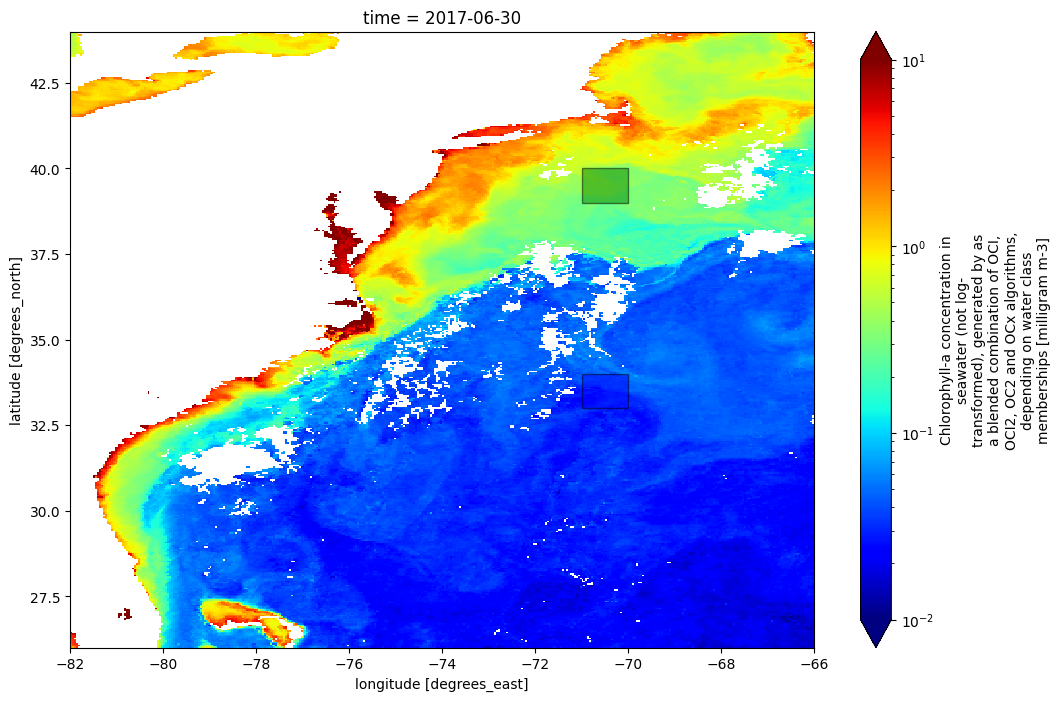

In [31]:
import matplotlib.patches as patches
fig,ax = plt.subplots(figsize=(12,8))
chla_ds = chla_ds.sel(lat=slice(44,26),lon=slice(-82,-66))
chla_ds.chlor_a.isel(time=1).plot(ax=ax, cmap='jet', norm=LogNorm(vmin=0.01, vmax=10))
rect = patches.Rectangle((-71, 33), 1, 1, linewidth=1, edgecolor='black', facecolor='b', alpha=0.5)
ax.add_patch(rect)
rect = patches.Rectangle((-71, 39), 1, 1, linewidth=1, edgecolor='black', facecolor='g', alpha=0.5)
ax.add_patch(rect)
#ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

Now let's select them and plot them across time:

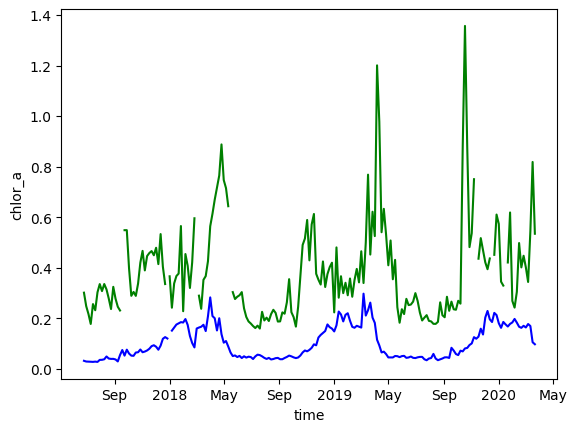

In [32]:
fig,ax = plt.subplots()
chla_ds.chlor_a.sel(lat=slice(33,32), lon=slice(-71,-70)).mean(dim=('lat', 'lon')).plot(ax=ax, color='blue')
chla_ds.chlor_a.sel(lat=slice(39,38), lon=slice(-71,-70)).mean(dim=('lat', 'lon')).plot(ax=ax, color='green')
plt.show()

As expected the region north of the Gulf Stream with more access to nutrients is has much more chl-a and it has a more intense spring bloom.

As a final step before going into interactive visualizations check out how easy it is to resample the dataset temporally. Let's make it a monthly dataset instead of 8 day time steps:

###### *caution* this resample operation may take a fair amount of memory and is liable to crash if you're running on a Binder instance with low memory

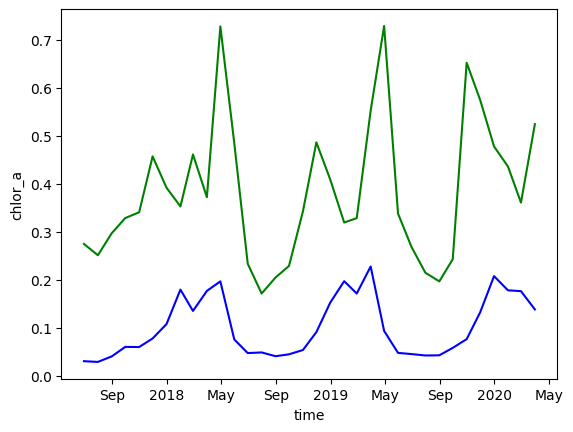

In [33]:
chla_ds_monthly = chla_ds.chlor_a.resample(time="ME").mean()

fig,ax = plt.subplots()
chla_ds_monthly.sel(lat=slice(33,32), lon=slice(-71,-70)).mean(dim=('lat', 'lon')).plot(ax=ax, color='blue')
chla_ds_monthly.sel(lat=slice(39,38), lon=slice(-71,-70)).mean(dim=('lat', 'lon')).plot(ax=ax, color='green')
plt.show()

### Now let's bring in `hvplot` and see what it can do

In [36]:
import hvplot
import hvplot.pandas
import hvplot.xarray
import cartopy.crs as crs

Let's make a similar plot to the one above where we selected the first time step but now let's make it interactive and with the ability to step through each time point. We'll also download the coastline and add that to the plot. 

Play around with the buttons on the left that allow you to zoom, save as an image, and move around the plot.

In [46]:
proj = crs.Orthographic(-90, 30)

chla_ds.chlor_a.hvplot.quadmesh(
    'lon', 'lat', projection=proj, project=True,
    cmap='jet', dynamic=True, coastline='10m', 
    frame_width=500, logz=True, clim=(0.01,20), rasterize=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'becb64aa-cc0c-4d1b-a0e0-1d99b3c53ffe': {'version…

Now let's looks at chla averaged for a subset of our time series and plotted spatially. Again play with the zooming and panning tools.

In [47]:
chla_ds.chlor_a.isel(time=slice(0,40)).mean(dim='time').hvplot(x="lon", y="lat", width=500, height=300, cmap='jet', logz=True, clim=(0.01,20), rasterize=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'71ac5336-6c47-40d9-8cd2-a1bd4bd3ae3e': {'version…

Hopefully you're begining to see how powerful this interactivity can be for explorng a dataset.

Pretty amazing already, and while it is relatively clear in this oceanographic dataset, it would be useful to have a better idea of where we are in the world!

We'll pull in `cartopy` and `geoviews.feature` to give projections and global features respectively. Explore options at https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html and http://geoviews.org/user_guide/Geometries.html.

In [44]:
import geoviews.feature as gf

# the * operator allows you to add multiple datasets to the same plot
# you can also use the + operator to add multiple plots to the same overall figure
gf.ocean * \
gf.land * \
chla_ds.chlor_a.isel(time=slice(0,40)).mean(dim='time').hvplot(x="lon", y="lat", width=500, height=300, cmap='jet', logz=True, clim=(0.01,20), global_extent=True, projection=proj) *\
gf.coastline * \
gf.borders

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Image.I     :Image   [lon,lat]   (chlor_a)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]

## Final Wrapup

Now we're actually getting into some informative plotting and edging into cartography and many of these tools incredibly useful for analyzing remote sensing data. And that ends our series, congrats on making it through the whole thing and please add an issue on github if you have any problems or suggestions for additions!